# Kantorovich distance as similiarity between documents

In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
%matplotlib inline

document_1 = ["media", "Illinois", "speaks", "Obama"]
document_2 = ["President", "greets", "press", "Chicago"]

### Load word embedding dictionary

In [2]:
word_embedding = np.load("word_embedding.npy", allow_pickle=True).item()

def distance(word1, word2):
    return np.linalg.norm(word_embedding[word1] - word_embedding[word2])

# TODO: Construct C matrix where C_ij = dist(document_1[i], document_2[j]).
C = np.array([[distance(word1, word2) for word2 in document_2] for word1 in document_1])

### Compute the transportation plan

In [3]:
# We assume that the length of document one and two are equal.
n = len(document_1)

# Compute normalized frequency vectors for sentence one and two. 
mu = [1. / n for _ in range(n)]
nu = [1. / n for _ in range(n)]

def find_transportation(n, C, mu, nu):
    # TODO: your implementation here
    M = cvx.Variable((n, n))
    objective = cvx.Minimize(cvx.trace(C.T@M))
    constraints = [M >= 0, cvx.sum(M, axis=1) == mu, cvx.sum(M, axis=0) == nu]
    prob = cvx.Problem(objective, constraints)
    prob.solve()
    
    return M

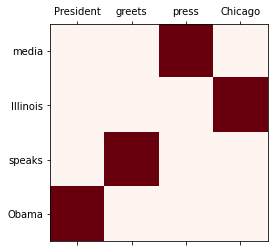

In [4]:
# Visualize P transportation plan
M = find_transportation(n, C, mu, nu)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(M.value, cmap="Reds")

# We want to show all ticks
ax.set_xticks(np.arange(len(document_1)))
ax.set_yticks(np.arange(len(document_2)))

ax.set_xticklabels(document_2)
ax.set_yticklabels(document_1)

plt.show()